In [1]:
!pip install -q -U google-generativeai

In [5]:
!pip install IPython

In [10]:
import pathlib
import textwrap
import google.generativeai as genai

from IPython.display import Markdown, display

def to_markdown(text):
  text = text.replace('.', ' *')
  return Markdown(textwrap.indent(text, '> ', predicate = lambda _: True))

In [2]:
# Used to securely store your API key
from google.colab import userdata

In [3]:
GOOGLE_API_KEY  = userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

In [4]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-lite-preview-02-05
models/gemini-2.0-flash-lite-preview
models/gemini-2.0-pro-exp
models/gemini-2.0-pro-exp-02-05
models/gemini-exp-1206
models/gemini-2.0-flash-thinking-exp-01-21
models/gemini-2.0-flash-thinking-exp
models/gemini-2.0-flash-thinking-exp-1219
models/learnlm-1.5-pro-experimental


In [5]:
model = genai.GenerativeModel('gemini-1.5-flash')

In [6]:
model

genai.GenerativeModel(
    model_name='models/gemini-1.5-flash',
    generation_config={},
    safety_settings={},
    tools=None,
    system_instruction=None,
    cached_content=None
)

In [7]:
%%time
response = model.generate_content("What is a meaning of life?")

CPU times: user 28.5 ms, sys: 5.13 ms, total: 33.6 ms
Wall time: 2.53 s


In [8]:
response

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "There's no single, universally agreed-upon meaning of life.  The question itself is philosophical and has been pondered by humans for millennia.  Different individuals and cultures find meaning in vastly different things.  Some possibilities include:\n\n* **Relationships:**  Connecting with others, building community, and experiencing love and belonging.\n* **Contribution:**  Making a positive impact on the world, leaving a legacy, helping others.\n* **Growth:**  Continuously learning, developing skills, and expanding one's understanding of oneself and the world.\n* **Experiences:**  Seeking out new adventures, exploring the world, and creating memories.\n* **Spiritual or Religious Belief:** Finding meaning through faith, connection to a higher power, and ad

In [11]:
to_markdown(response.text)

> There's no single, universally agreed-upon meaning of life *  The question itself is philosophical and has been pondered by humans for millennia *  Different individuals and cultures find meaning in vastly different things *  Some possibilities include:
> 
> * **Relationships:**  Connecting with others, building community, and experiencing love and belonging *
> * **Contribution:**  Making a positive impact on the world, leaving a legacy, helping others *
> * **Growth:**  Continuously learning, developing skills, and expanding one's understanding of oneself and the world *
> * **Experiences:**  Seeking out new adventures, exploring the world, and creating memories *
> * **Spiritual or Religious Belief:** Finding meaning through faith, connection to a higher power, and adherence to religious principles *
> * **Creativity:** Expressing oneself through art, music, writing, or other forms of creative endeavor *
> * **Purpose:**  Discovering and pursuing a specific goal or vocation that feels inherently fulfilling *
> * **Happiness and Well-being:**  Focusing on personal contentment, emotional health, and overall satisfaction with life *
> 
> Ultimately, the meaning of life is subjective *  It's not something to be found, but something to be created and defined by each individual based on their values, beliefs, and experiences *  The search for meaning itself can be a significant part of a fulfilling life *


In [12]:
response.prompt_feedback

In [14]:
for chunk in response:
  print(chunk.text)
  print("__"*80)

There's no single, universally agreed-upon meaning of life.  The question itself is philosophical and has been pondered by humans for millennia.  Different individuals and cultures find meaning in vastly different things.  Some possibilities include:

* **Relationships:**  Connecting with others, building community, and experiencing love and belonging.
* **Contribution:**  Making a positive impact on the world, leaving a legacy, helping others.
* **Growth:**  Continuously learning, developing skills, and expanding one's understanding of oneself and the world.
* **Experiences:**  Seeking out new adventures, exploring the world, and creating memories.
* **Spiritual or Religious Belief:** Finding meaning through faith, connection to a higher power, and adherence to religious principles.
* **Creativity:** Expressing oneself through art, music, writing, or other forms of creative endeavor.
* **Purpose:**  Discovering and pursuing a specific goal or vocation that feels inherently fulfilling.

Genrate text from image and text inputs

In [19]:
# prompt: install PIL to use it PIL.image

!pip install Pillow


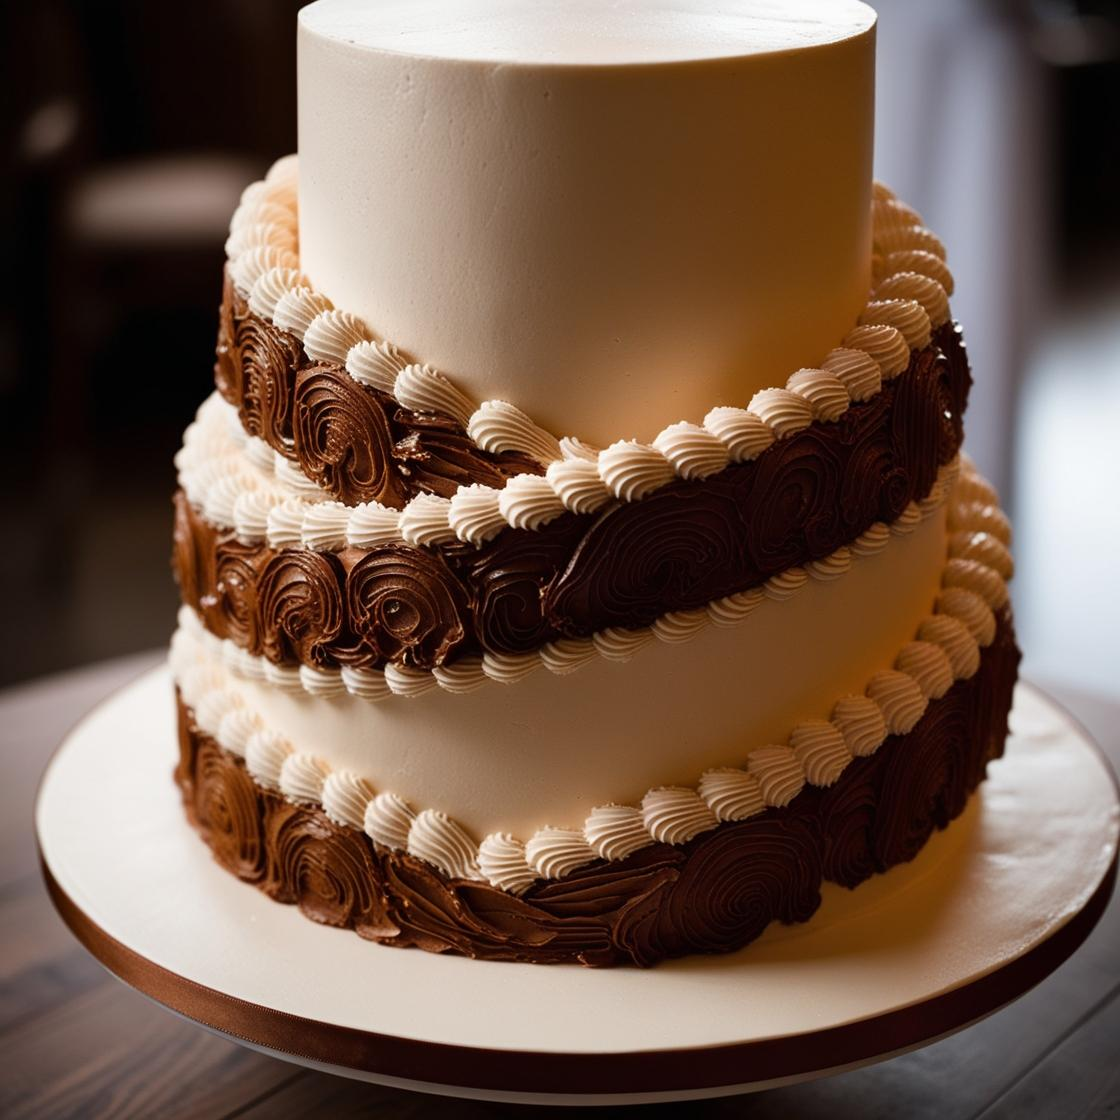

In [24]:
import PIL.Image

img = PIL.Image.open('image.png')
img

In [29]:
model = genai.GenerativeModel('gemini-1.5-flash')

In [30]:
response = model.generate_content(img)

to_markdown(response.text)

> Here's a description of the image:
> 
> Close-up view of a three-tiered wedding cake * 
> 
> 
> Here's a breakdown of its features:
> 
> * **Cake:** The cake is predominantly off-white or light beige * Each tier is decorated with a swirling pattern of dark brown and off-white frosting * The brown frosting appears to be piped in a rosette or shell pattern, creating a textured and visually appealing design * The off-white frosting is piped in a simpler rope or wave-like pattern, contrasting beautifully with the brown *
> 
> * **Layers:** The three tiers are stacked, with the largest at the bottom and the smallest on top * The layers are clearly defined, and the frosting appears smooth and even *
> 
> * **Cake Stand:** The cake sits on a large, round, off-white cake stand with a subtle brown or bronze-colored edge, providing a simple yet elegant presentation *
> 
> * **Setting:** The background is blurred, suggesting a dimly lit, perhaps rustic or elegant, indoor setting * The focus is entirely on the cake *
> 
> The overall impression is one of elegance and sophistication * The color scheme is simple but effective, and the cake's design is intricate and visually appealing *


Create a blog

In [34]:
response = model.generate_content(["Write a short, engaging blog post based on this picture. It should include the description of the photo and talk about the preparation.", img], stream= True)

In [36]:
response.resolve()

In [37]:
to_markdown(response.text)

> ## A Swirl of Elegance: The Making of a Dream Cake
> 
> This isn't just any cake; it's a masterpiece *  Three tiers of delicate, ivory-colored buttercream, each meticulously adorned with a swirling ribbon of rich, dark chocolate frosting, create a visual symphony * The chocolate swirls are artfully piped in a rosette pattern, alternating with delicate rope-like borders of creamy white frosting *  It's the kind of cake that stops you in your tracks *
> 
> But behind this stunning creation lies hours of careful preparation *  Imagine the precise measurements, the careful mixing of the perfect buttercream consistency, and the patience required to pipe those intricate details * Each swirl is a testament to the baker's skill and dedication *  Think of the time spent chilling the layers to ensure stability, the gentle leveling to create that perfect, smooth surface *  Even the choice of the off-white and rich brown creates a sophisticated palette that's both classic and modern *
> 
> This is more than just a dessert; it's a celebration of artistry, patience, and the sweet culmination of painstaking effort *  It’s a cake that tastes as good as it looks, a moment captured in buttercream and chocolate *
